In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet50, inception_v3, densenet121, mobilenet_v2, convnext_tiny
import torch.optim as optim
from torch_funcs import inception_fit, fit, test, get_cifar10_loaders, get_mnist_loaders, FullyConnectedNet

In [2]:
# config
batch_size = 4
test_batch_size = 8
epochs = 2
lr = 1e-3
momentum = 0.9
loss_func = F.cross_entropy
num_classes = 10
log_interval = 500

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)

CUDA enabled: True
Files already downloaded and verified
Files already downloaded and verified


Important thing to remember here is that basically no nets can work on CIFAR-10 dataset direclty as 32x32 images are too
small. That's why `get_cifar10_loaders` internally resizes all pictures to (by default) 224x224 pixels to meet the
requirements as suggested
[here](https://discuss.pytorch.org/t/given-input-size-256x1x1-calculated-output-size-256x0x0/40941). 
  
This input transform shall be repeated for all technologies examined in this paper.

In [3]:
def whole_thing(predef_model):
	opt = optim.SGD(predef_model.parameters(), lr=lr, momentum=momentum)

	train_history = []
	acc_history = []

	for epoch in range(1, epochs + 1):
		train_history.extend( fit(predef_model, device, train_dl, loss_func, epoch, optimizer=opt, log_interval=log_interval, silent=False) )
		acc_history.append( test(predef_model, device, test_dl, loss_func, silent=True) )

	fig, (ax1, ax2) = plt.subplots(1, 2)
	fig.set_size_inches(12.8, 4.8)

	ax1.plot(train_history)
	ax1.set_title('Training history')

	ax2.plot(acc_history)
	ax2.set_title('Accuracy history')

	del opt, train_history, acc_history

ResNet50 - 2015
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 3.216310
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.446390
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.339204
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.242854
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 2.158060
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 2.122431
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 2.048624
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 2.035928
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 2.027471
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 2.020015
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 1.986954
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 1.967383
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 1.934745
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 1.909575
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 1.902729
Train Epoch: 1 -> 

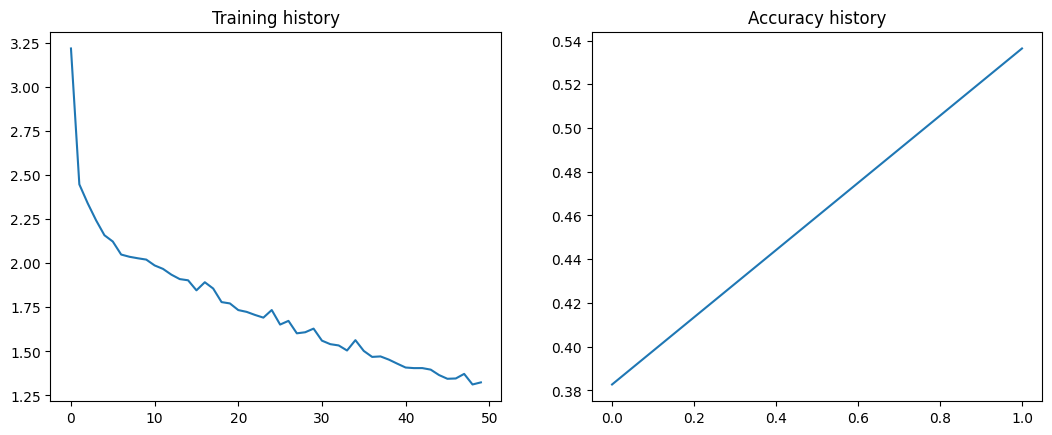

In [4]:
print('ResNet50 - 2015')

model = resnet50()
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model) 

del model # explicit deletion as GC doesn't seem to free VRAM

Inception v3 - 2016
Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 3.313022
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 3.038260
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.944566
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.804053
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 2.807874
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 2.701277
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 2.676300
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 2.601008
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 2.557851
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 2.503131
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 2.477439
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 2.422755
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 2.334300
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 2.349463
Tra

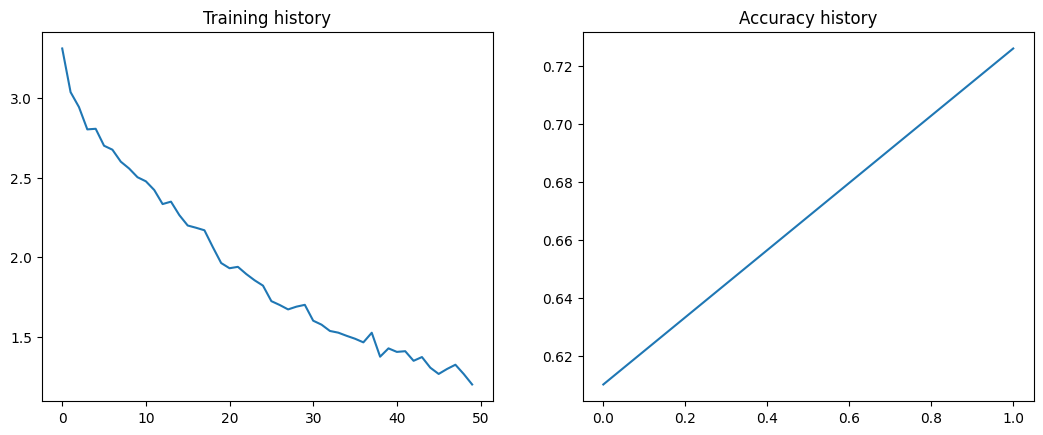

In [5]:
print('Inception v3 - 2016')

model = inception_v3(init_weights=False)
model.AuxLogits.fc = nn.Linear(in_features=768, out_features=num_classes, bias=True)
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

inception_train_dl, inception_test_dl = get_cifar10_loaders(batch_size, test_batch_size, 299)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

for epoch in range(1, epochs + 1):
	train_history.extend( inception_fit(model, device, inception_train_dl, loss_func, epoch, opt, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, inception_test_dl, loss_func, silent=True) )

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax1.plot(train_history)
ax1.set_title('Training history')

ax2.plot(acc_history)
ax2.set_title('Accuracy history')

del model, opt, train_history, acc_history, inception_train_dl, inception_test_dl

Densenet121 - 2018
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 2.172934
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.072403
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.028401
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 1.918192
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 1.906779
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 1.844112
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 1.827143
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 1.846398
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 1.773088
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 1.757264
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 1.689305
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 1.714939
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 1.680108
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 1.635304
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 1.627656
Train Epoch: 1 

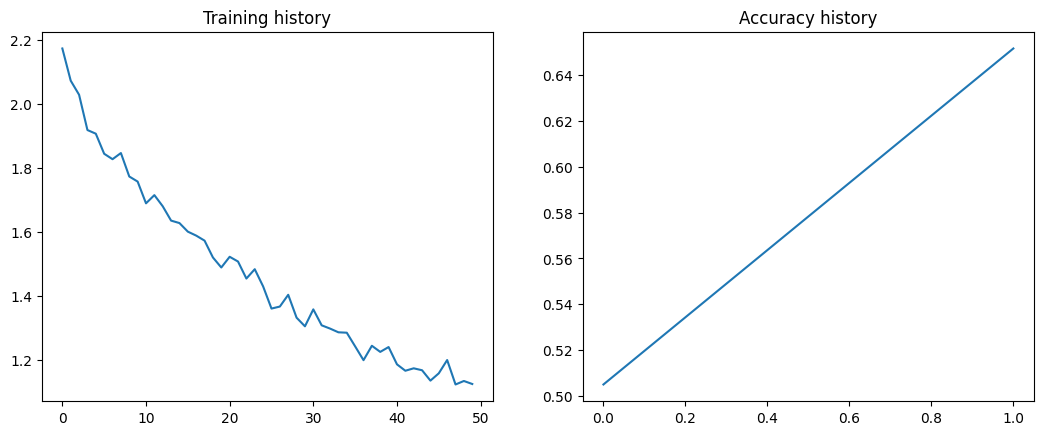

In [6]:
print('Densenet121 - 2018')

model = densenet121()
model.classifier = nn.Linear(in_features=1024, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

MobileNet v2 - 2019
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 2.235814
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.096430
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.061125
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.047240
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 1.964964
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 1.967821
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 1.933919
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 1.921789
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 1.879290
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 1.800562
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 1.803869
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 1.746128
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 1.713856
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 1.747265
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 1.638880
Train Epoch: 1

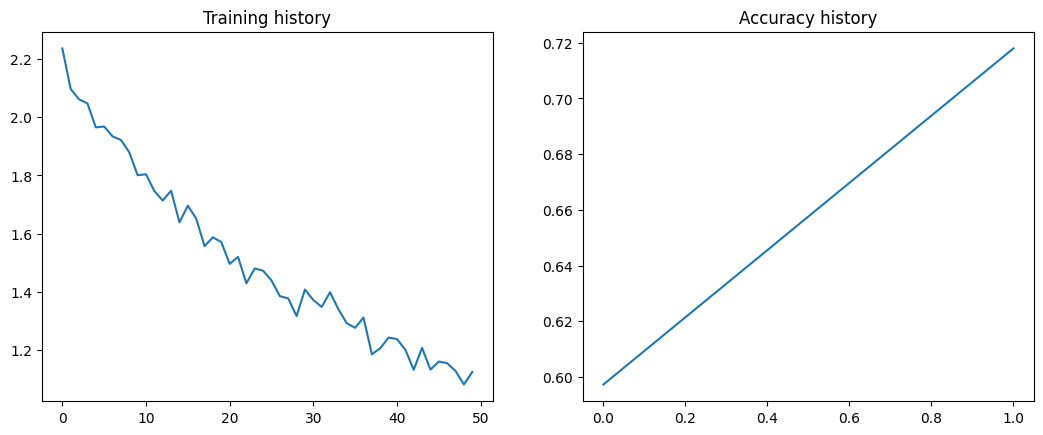

In [7]:
print('MobileNet v2 - 2019')

model = mobilenet_v2()
model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

ConvNeXt - 2020
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 2.734105
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.565182
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.461505
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.426389
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 2.241348
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 2.173507
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 2.135143
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 2.162068
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 2.116563
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 2.124700
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 2.104095
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 2.126621
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 2.116147
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 2.102674
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 2.099281
Train Epoch: 1 -> 

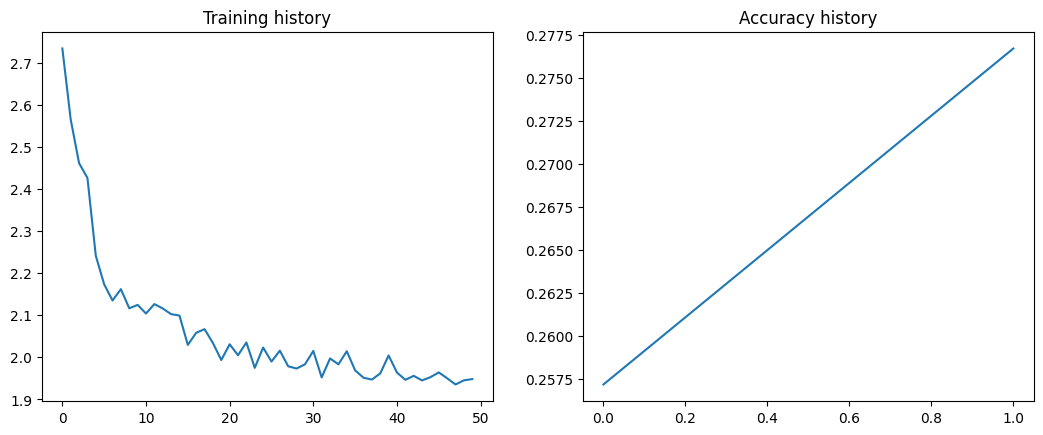

In [4]:
print('ConvNeXt - 2020')

model = convnext_tiny()
model.classifier[2] = nn.Linear(in_features=768, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

Fully connected MLP - Simard et al. 2003
Train Epoch: 1 -> batch: 399 [25536/60000 (43%)]	Loss: 0.691921
Train Epoch: 1 -> batch: 799 [51136/60000 (85%)]	Loss: 0.379151
Train Epoch: 2 -> batch: 399 [25536/60000 (43%)]	Loss: 0.332554
Train Epoch: 2 -> batch: 799 [51136/60000 (85%)]	Loss: 0.269157
Train Epoch: 3 -> batch: 399 [25536/60000 (43%)]	Loss: 0.243742
Train Epoch: 3 -> batch: 799 [51136/60000 (85%)]	Loss: 0.214777
Train Epoch: 4 -> batch: 399 [25536/60000 (43%)]	Loss: 0.193695
Train Epoch: 4 -> batch: 799 [51136/60000 (85%)]	Loss: 0.180245
Train Epoch: 5 -> batch: 399 [25536/60000 (43%)]	Loss: 0.160581
Train Epoch: 5 -> batch: 799 [51136/60000 (85%)]	Loss: 0.159869


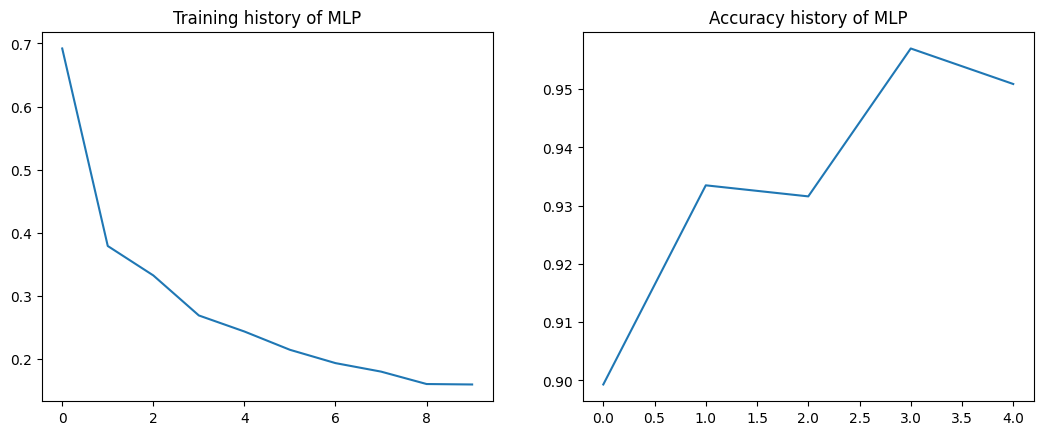

In [9]:
# config
fc_batch_size = 64
fc_test_batch_size = 128
epochs = 5
lr = 1e-2
momentum = 0.9
log_interval = 400
loss_func = F.nll_loss # FCNet returns log_softmax -> with nll eq to cross entropy

train_dl, _, test_dl = get_mnist_loaders(fc_batch_size, fc_test_batch_size)

model = FullyConnectedNet().to(device)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

print('Fully connected MLP - Simard et al. 2003')
for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, opt, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history)
ax_test.plot(acc_history)
ax_train.set_title('Training history of MLP')
ax_test.set_title('Accuracy history of MLP')

del model, opt, train_history, acc_history